In [1]:
from CoolProp.CoolProp import PropsSI
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from CoolProp.Plots import PropertyPlot

In [2]:
#definindo funções de conversão
def celcius_to_kelvin(T):
    return T + 273.15

def psi_to_pascal(P,manometro=True):
    if manometro:
        return P * 6894 + 101325
    return P * 6894


# Cáculos iniciais

## Propriedades do ciclo de refrigeração

In [3]:
# definindo variáveis de entrada

# refrigeradorv

P1_r = psi_to_pascal(25)
T1_r = celcius_to_kelvin(2)
H1_r = PropsSI('H','P',(P1_r),'T',(T1_r),'R134a')

P2_r = psi_to_pascal(140)
T2_r = celcius_to_kelvin(41)
H2_r = PropsSI('H','P',(P2_r),'T',(T2_r),'R134a')


P3_r = psi_to_pascal(115)
T3_r = celcius_to_kelvin(30)
H3_r = PropsSI('H','P',(P3_r),'T',(T3_r),'R134a')

P4_r = psi_to_pascal(0)
T4_r = celcius_to_kelvin(12)
H4_r = H3_r

#calculando variações

delta_T_eva_r = T1_r - T4_r
delta_T_cond_r = T3_r - T2_r
delta_P_eva_r = P1_r - P4_r
delta_P_cond_r = P3_r - P2_r

#calculo de COP

COP_r = (H1_r - H4_r)/(H2_r - H1_r)

ref_prop_df = pd.DataFrame(
    np.array((
        [T1_r,P1_r,H1_r],
        [T2_r,P2_r,H2_r],
        [T3_r,P3_r,H3_r],
        [T4_r,P4_r,H4_r],
    )),
    columns=[
        'Temperatura',
        'Pressão',
        'Entalpia'
    ]
)

ref_calc_df = pd.DataFrame(
    np.array((
        [
            delta_T_eva_r,
            delta_T_cond_r,
            delta_P_eva_r, 
            delta_P_cond_r, 
            COP_r
        ]
    )).reshape(1,5),
    columns=[
        "delta_T_eva",
        "delta_T_cond",
        "delta_P_eva", 
        "delta_P_cond", 
        "COP"
    ]
)



Dados do experimento como refrigerador

In [4]:
ref_prop_df

,Temperatura,Pressão,Entalpia
0,275.15,273675.0,400931.73534
1,314.15,1066485.0,257900.31792
2,303.15,894135.0,241718.67988
3,285.15,101325.0,241718.67988


In [5]:
ref_calc_df

,delta_T_eva,delta_T_cond,delta_P_eva,delta_P_cond,COP
0,-10.0,-11.0,172350.0,-172350.0,-1.113133


## Propriedades do ciclo de bomba de calor

In [6]:
# bomba de calor

P1_H = psi_to_pascal(130)
T1_H = celcius_to_kelvin(41)

P2_H = psi_to_pascal(30)
T2_H = celcius_to_kelvin(2)
H2_H = PropsSI('H','P',(P2_H),'T',(T2_H),'R134a')

P3_H = psi_to_pascal(0)
T3_H = celcius_to_kelvin(2)
H3_H = PropsSI('H','P',(P3_H),'T',(T3_H),'R134a')

P4_H = psi_to_pascal(110)
T4_H = celcius_to_kelvin(35)
H4_H = PropsSI('H','P',(P4_H),'T',(T4_H),'R134a')

H1_H = H3_r

#calculando variações

delta_T_eva_H = T2_H - T3_H
delta_T_cond_H = T4_H - T1_H
delta_P_eva_H = P2_H - P3_H
delta_P_cond_H = P4_H - P1_H

#calculo de COP

COP_H = (H4_H - H1_H)/(H1_H - H2_H)

hb_prop_df = pd.DataFrame(
    np.array((
        [T1_H,P1_H,H1_H],
        [T2_H,P2_H,H2_H],
        [T3_H,P3_H,H3_H],
        [T4_H,P4_H,H4_H],
    )),
    columns=[
        'Temperatura',
        'Pressão',
        'Entalpia'
    ]
)

hb_calc_df = pd.DataFrame(
    np.array((
        [
            delta_T_eva_H,
            delta_T_cond_H,
            delta_P_eva_H, 
            delta_P_cond_H, 
            COP_H
        ]
    )).reshape(1,5),
    columns=[
        "delta_T_eva",
        "delta_T_cond",
        "delta_P_eva", 
        "delta_P_cond", 
        "COP"
    ]
)

Dados do experimento como bomba de calor

In [7]:
hb_prop_df

,Temperatura,Pressão,Entalpia
0,314.15,997545.0,241718.679880
1,275.15,308145.0,399954.364283
2,275.15,101325.0,405332.441723
3,308.15,859665.0,417891.448708


In [8]:
hb_calc_df

,delta_T_eva,delta_T_cond,delta_P_eva,delta_P_cond,COP
0,0.0,-6.0,206820.0,-137880.0,-1.113357


# Representação em diagramas PxH

## Ciclo de refrigeração

/home/thiago/anaconda3/envs/default/lib/python3.9/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 8771670.263783, 2426.329225 with index (248,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 247.390746622 J/mol/K
  warnings.warn(
/home/thiago/anaconda3/envs/default/lib/python3.9/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 9133000.049092, 2426.329225 with index (249,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 246.954593629 J/mol/K
  warnings.warn(
/home/thiago/anaconda3/envs/default/lib/python3.9/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 1426198.569157, 2593.934527 wi

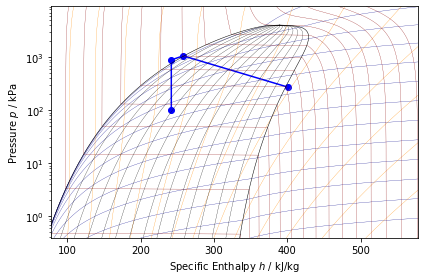

In [9]:
ph_plot = PropertyPlot('R134a', 'Ph')
ph_plot.calc_isolines()
ax = ph_plot.axis
ax.plot(ref_prop_df.Entalpia/10**3,
    ref_prop_df.Pressão/10**3,
    'o', 
    ref_prop_df.Entalpia/10**3, 
    ref_prop_df.Pressão/10**3, 
    '-',
    color='b',
)
ph_plot.show()

## Ciclo de refrigeração

/home/thiago/anaconda3/envs/default/lib/python3.9/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 8771670.263783, 2426.329225 with index (248,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 247.390746622 J/mol/K
  warnings.warn(
/home/thiago/anaconda3/envs/default/lib/python3.9/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 9133000.049092, 2426.329225 with index (249,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.563 J/mol/K] is above the maximum value of 246.954593629 J/mol/K
  warnings.warn(
/home/thiago/anaconda3/envs/default/lib/python3.9/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 1426198.569157, 2593.934527 wi

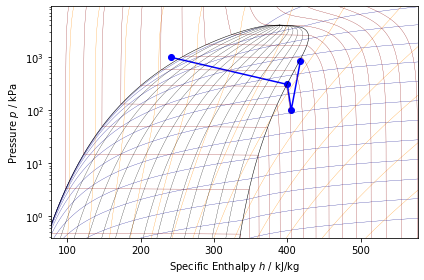

In [10]:
ph_plot = PropertyPlot('R134a', 'Ph')
ph_plot.calc_isolines()
ax = ph_plot.axis
ax.plot(hb_prop_df.Entalpia/10**3,
    hb_prop_df.Pressão/10**3,
    'o', 
    hb_prop_df.Entalpia/10**3, 
    hb_prop_df.Pressão/10**3, 
    '-',
    color='b',
)
ph_plot.show()

# Análise de COP

## ciclo de refrigeração

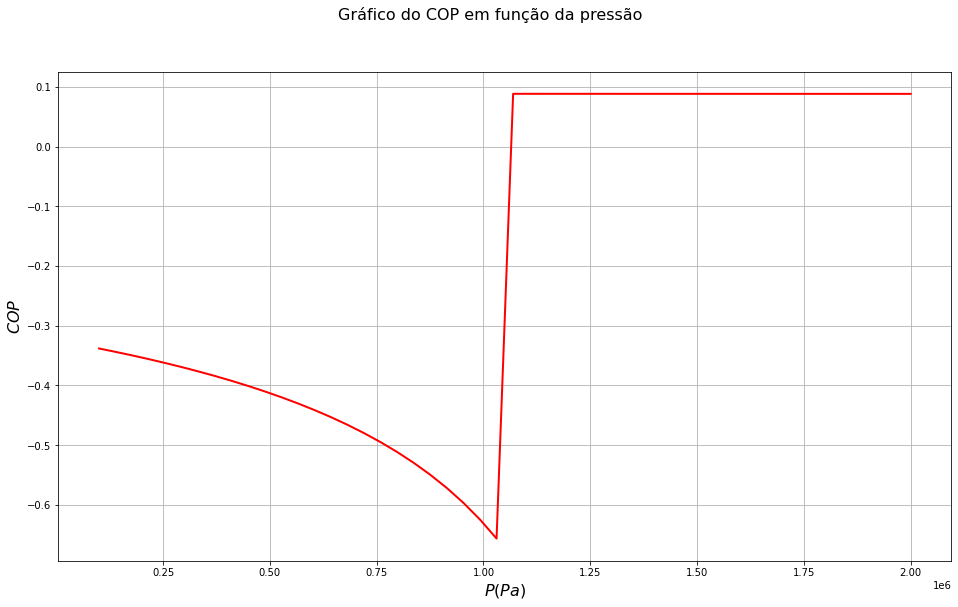

In [74]:
# definindo variáveis de entrada

# refrigerador

P2_eval = np.linspace(100000,0.2e7)

H_list = []

for P in P2_eval:
    H = PropsSI('H','P',(P),'T',(T2_r),'R134a') 
    H_list.append(H)

#calculo de COP

COP_list = []

for H in H_list:
    COP = (H1_r - H4_r)/(H - H1_r)
    COP_list.append(COP)

# plotagem gráfico

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Gráfico do COP em função da pressão', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('$P(Pa)$',fontsize=16)
ax.set_ylabel("$COP$",fontsize=16)

ax.plot(P2_eval, COP_list, 'r', linewidth=2)

ax.grid()

plt.show()


## ciclo da bomba do calor

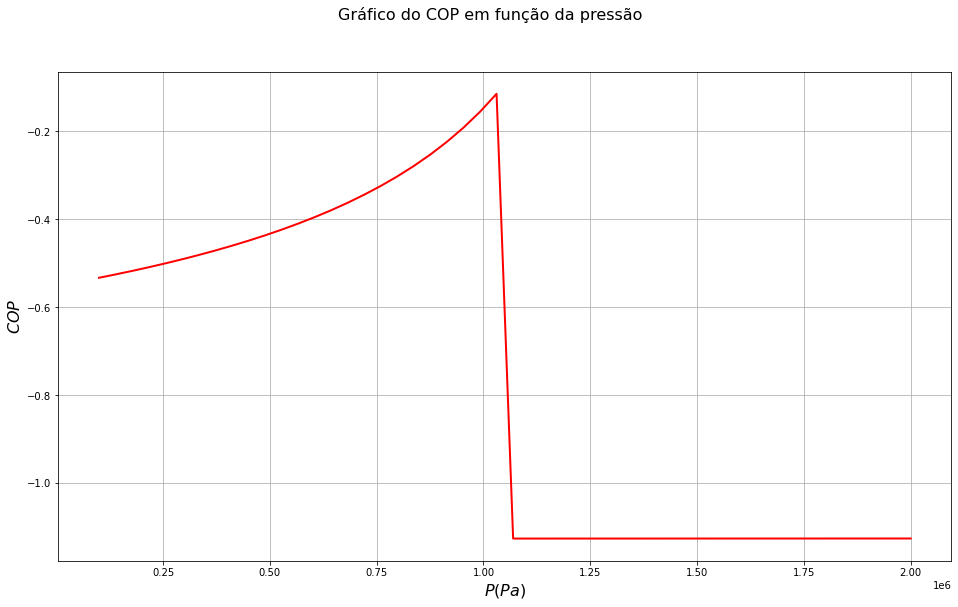

In [75]:
# definindo variáveis de entrada

# refrigerador

P_eval = np.linspace(100000,0.2e7)

H_list = []

for P in P_eval:
    H = PropsSI('H','P',(P),'T',(T2_r),'R134a') 
    H_list.append(H)

#calculo de COP

COP_list = []

for H in H_list:
    COP = (H4_H - H)/(H - H2_H)
    COP_list.append(COP)

# plotagem gráfico

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Gráfico do COP em função da pressão', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('$P(Pa)$',fontsize=16)
ax.set_ylabel("$COP$",fontsize=16)

ax.plot(P2_eval, COP_list, 'r', linewidth=2)

ax.grid()

plt.show()


# Cálculo de pressão

In [6]:
#dados do compressor 

I = 3.5
V = 127

#incerteza do compressor

u_comp = (127**2 * 0.5**2)**0.5

P_comp = V * I

print("P_comp = ({:.3f} +/- {:.3f}) W".format(P_comp, u_comp))

P_comp = (444.500 +/- 63.500) W
